In [1]:
from pycaret.datasets import get_data
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# 初始化设置
from pycaret.regression import *
from pycaret.regression import setup

# session_id 随机种子
# normalize 进行标准化
#       normalize_method 进行什么样的标准化（默认zscore）
# polynomial_features 多项式特征——拓展特征的一种方式
# trigonometry_features 三角学特征——文档上没有
# feature_interaction 特征交互——文档上没有
# bin_numeric_features 数字特征转换为类别
s = setup(data, target="charges", session_id=123, normalize=True,
         polynomial_features=True, trigonometry_features=True, 
         feature_interaction=True, bin_numeric_features=["age", "bmi"])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [4]:
# 模型训练
lr = create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2974.9697,20903850.0000,4572.0728,0.8751,0.3909,0.3158
1,3487.7493,32522774.0000,5702.8740,0.8109,0.4418,0.3378
2,3015.1313,23367122.0000,4833.9551,0.7041,0.5432,0.4089
3,2934.5674,19558636.0000,4422.5146,0.8367,0.4732,0.3946
4,3235.1047,27340318.0000,5228.7969,0.7967,0.4556,0.3098
5,3415.4805,26663976.0000,5163.7173,0.8285,0.4716,0.3093
6,2949.6812,25429388.0000,5042.7559,0.8270,0.3803,0.3159
7,3499.5073,30093706.0000,5485.7729,0.8345,0.4745,0.3157
8,3124.8279,22806184.0000,4775.5820,0.8527,0.4059,0.3348


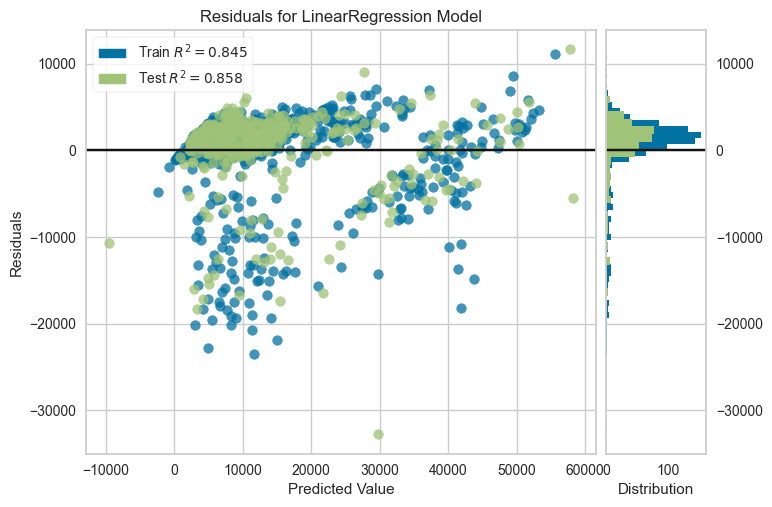

In [5]:
# 绘制训练模型的残差
plot_model(lr, plot="residuals")

In [7]:
# 保存转换流水线 和 模型
save_model(lr, model_name="model/lr_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'